In [24]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

samples = [
    "I hate when Ethereum fees spike!",
    
    "Bitcoin just broke an all-time high!",
    "This market is complete garbage.",
    "I’m bullish on Solana this week!",
    "Everyone is panic selling right now.",
    "Massive gains ahead! 🚀🔥"
]

for sentence in samples:
    print(f"{sentence} → {analyzer.polarity_scores(sentence)}")

I hate when Ethereum fees spike! → {'neg': 0.499, 'neu': 0.501, 'pos': 0.0, 'compound': -0.6114}
Bitcoin just broke an all-time high! → {'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'compound': -0.4753}
This market is complete garbage. → {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I’m bullish on Solana this week! → {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Everyone is panic selling right now. → {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.5106}
Massive gains ahead! 🚀🔥 → {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.4003}


[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
!pip install praw nltk pandas
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime
import nltk

# Make sure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Set up your Reddit API credentials
reddit = praw.Reddit(
    client_id='sp8iB2b_NF_pSW0hGiQuhQ',         # <-- Replace with your client_id
    client_secret='fMpW28XPnveVsVVzzPMPn1lswKKKig', # <-- Replace with your client_secret
    user_agent='sentiment-app by OkStrawberry8822'
)

subreddit_name = "CryptoCurrency"  # Change if needed
num_posts = 5000

analyzer = SentimentIntensityAnalyzer()
results = []

print("Collecting posts...")

for post in reddit.subreddit(subreddit_name).new(limit=num_posts):
    text = post.title + " " + (post.selftext or "")
    sentiment = analyzer.polarity_scores(text)["compound"]
    results.append({
        "timestamp": datetime.utcfromtimestamp(post.created_utc),
        "text": text,
        "sentiment": sentiment
    })

df = pd.DataFrame(results)
df.to_csv("reddit_crypto_posts_raw.csv", index=False)
print("Saved raw posts to reddit_crypto_posts_raw.csv")

[nltk_data] Downloading package vader_lexicon to C:\Users\Feryel
[nltk_data]     Gritli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saved raw posts to reddit_crypto_posts_raw.csv


In [28]:
import pandas as pd
df = pd.read_csv("reddit_crypto_posts_raw.csv")
print(df.head())

             timestamp                                               text  \
0  2025-07-23 18:46:37  The 180-Day Report Is Done: U.S. to Release Di...   
1  2025-07-23 18:45:05  Crypto accumulation for my kids Hi community, ...   
2  2025-07-23 18:42:00  ‘This isn’t a top’: Here’s why Bitcoin analyst...   
3  2025-07-23 18:10:00  Any multi-chain DEX? Title says it all. Is the...   
4  2025-07-23 17:54:27            Average Crypto Guys iPhone Camera Roll    

   sentiment  
0     0.3612  
1     0.9107  
2     0.0000  
3     0.9034  
4     0.0000  


In [29]:
import pandas as pd

# Load your raw CSV
df = pd.read_csv("reddit_crypto_posts_raw.csv", parse_dates=["timestamp"])

# Set timestamp as the DataFrame index
df.set_index("timestamp", inplace=True)

# Aggregate by hour (mean sentiment per hour)
hourly = df["sentiment"].resample("H").mean().reset_index()
hourly.rename(columns={"sentiment": "avg_sentiment"}, inplace=True)

# Save to CSV for later use
hourly.to_csv("reddit_sentiment_hourly.csv", index=False)
print("Hourly sentiment aggregation complete. Preview:")
print(hourly.head())

Hourly sentiment aggregation complete. Preview:
            timestamp  avg_sentiment
0 2025-07-09 11:00:00      -0.526700
1 2025-07-09 12:00:00      -0.064975
2 2025-07-09 13:00:00       0.334733
3 2025-07-09 14:00:00       0.500925
4 2025-07-09 15:00:00       0.109400


C:\Users\Feryel Gritli\AppData\Local\Temp\ipykernel_26288\4144890387.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df["sentiment"].resample("H").mean().reset_index()


In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(hourly["timestamp"], hourly["avg_sentiment"], marker="o")
plt.xlabel("Time (Hourly)")
plt.ylabel("Average Sentiment (VADER)")
plt.title("Crypto Reddit Sentiment Over Time (Hourly Aggregation)")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [31]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.0 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.2 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.2 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/8.1 MB 1.2 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/8.1 MB 1.2 MB/s eta 0:00:05
   -------------- ---------------

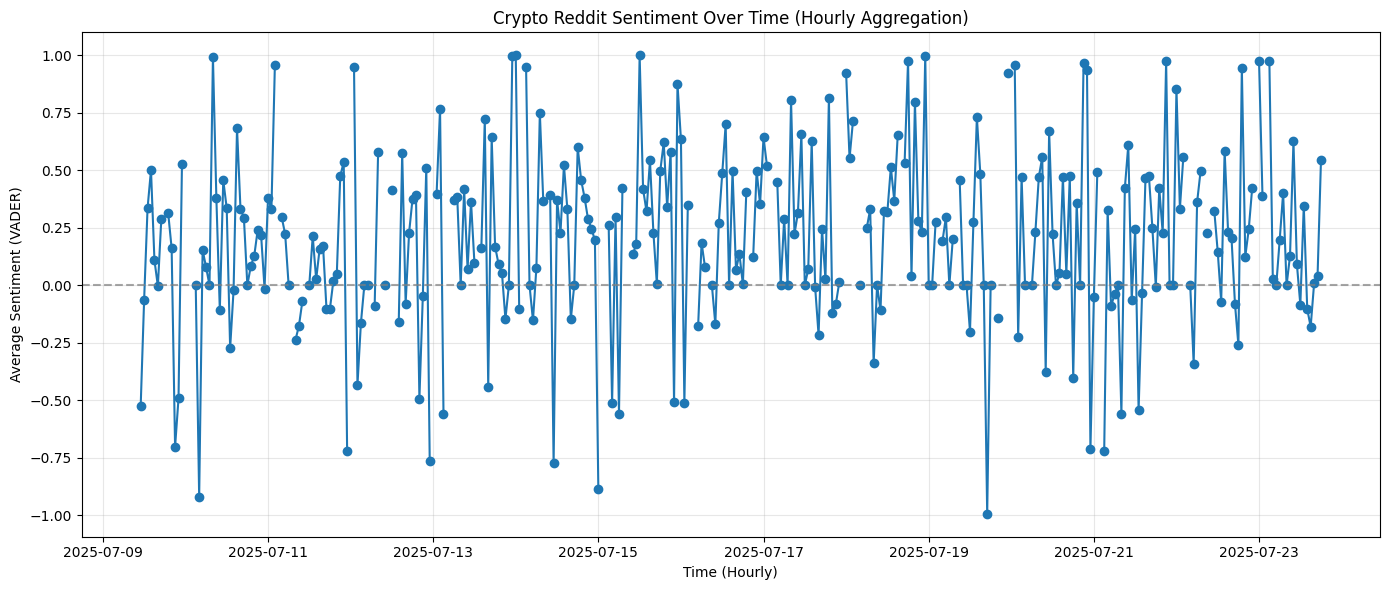

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(hourly["timestamp"], hourly["avg_sentiment"], marker="o")
plt.xlabel("Time (Hourly)")
plt.ylabel("Average Sentiment (VADER)")
plt.title("Crypto Reddit Sentiment Over Time (Hourly Aggregation)")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd

# 1. Load your CSV file
df = pd.read_csv("reddit_crypto_posts_raw.csv")

# 2. Define the coin detection function
def detect_coin(text):
    text = str(text).lower()
    if "bitcoin" in text or "btc" in text:
        return "BTC"
    elif "ethereum" in text or "eth" in text:
        return "ETH"
    elif "binance" in text or "bnb" in text or "BNB" in text:
        return "BNB"
    elif "cardano" in text or "ada" in text or "ADA" in text:
        return "ADA"
        
    elif "solana" in text or "sol" in text:
        return "SOL"
    elif "dogecoin" in text or "doge" in text:
        return "DOGE"
    # Add more coins as needed!
    else:
        return "OTHER"

# 3. Apply the function to the 'text' column to create a new 'coin' column
df['coin'] = df['text'].apply(detect_coin)

# 4. (Optional) Check results
print(df['coin'].value_counts())

# 5. Save to a new CSV with the coin column added
df.to_csv("reddit_crypto_posts_with_coins.csv", index=False)
print("Saved to reddit_crypto_posts_with_coins.csv")

coin
OTHER    390
BTC      219
ETH      138
SOL       25
BNB       14
ADA        9
DOGE       4
Name: count, dtype: int64
Saved to reddit_crypto_posts_with_coins.csv
